**Univariate Analysis (Single Feature Analysis)**<br>

Objective: Understand the distribution and characteristics of a single feature using histograms boxplots, and violin plots.<br>

Dataset: Use the Iris dataset or any dataset with multiple numerical features.


Title: Histogram<br>

Task 1: Plot a histogram of the petal length feature.

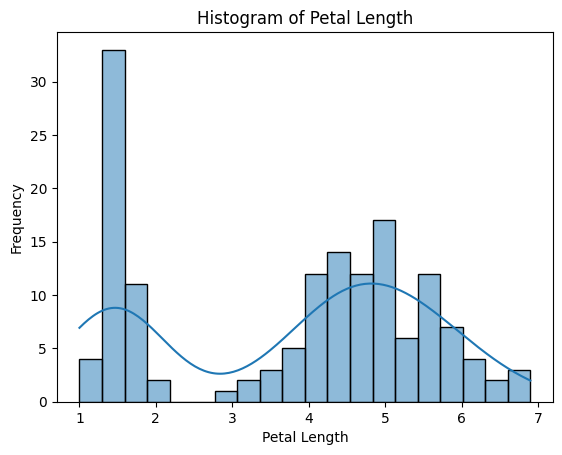

In [1]:
# Write your code from here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
import numpy as np

df = sns.load_dataset('iris')

sns.histplot(df['petal_length'], kde=True, bins=20)
plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.show()

Title: Boxplots<br>

Task 2: Plot a boxplot of the petal length feature.

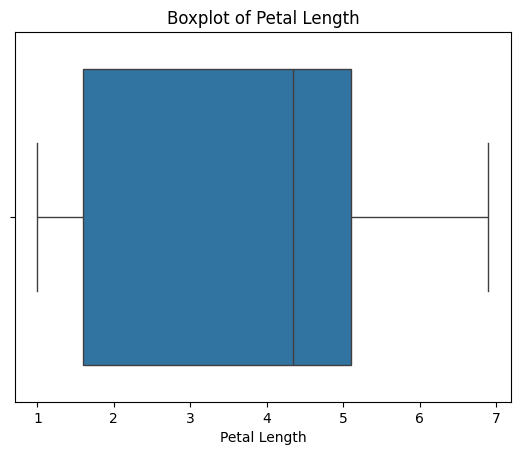

In [2]:
# Write your code from here
sns.boxplot(x=df['petal_length'])
plt.title('Boxplot of Petal Length')
plt.xlabel('Petal Length')
plt.show()

Title: Violin Plots<br>

Task 3: Plot a violin plot of the petal length feature.

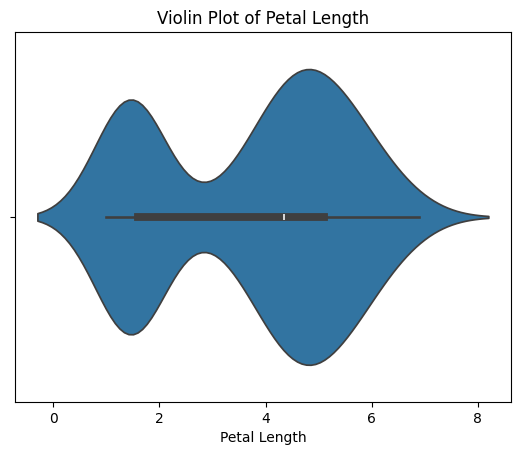

In [3]:
# Write your code from here
sns.violinplot(x=df['petal_length'])
plt.title('Violin Plot of Petal Length')
plt.xlabel('Petal Length')
plt.show()

**Bivariate Analysis (Relationships Between Features)**<br>

Objective: Explore relationships between two features using scatter plots and correlation heatmaps.

Title: Scatter Plots<br>

Task 1: Create a scatter plot between sepal length and sepal width.<br>
Task 2: Scatter plot between petal length and petal width.<br>
Task 3: Scatter plot between sepal length and petal length.<br>

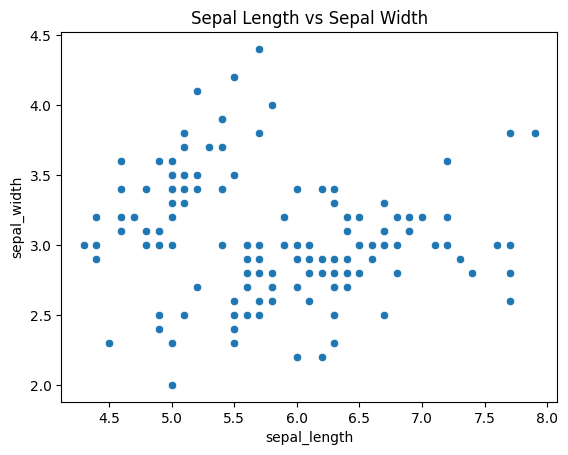

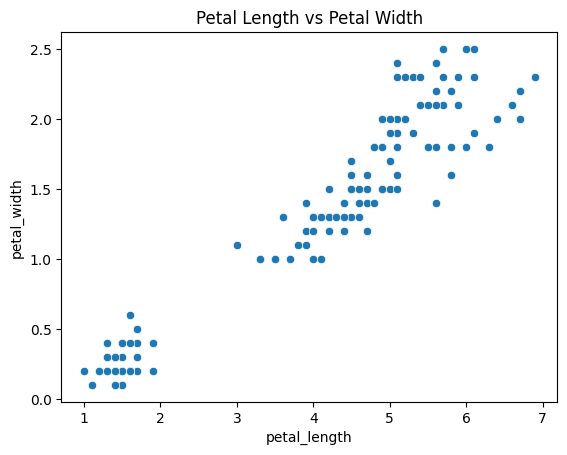

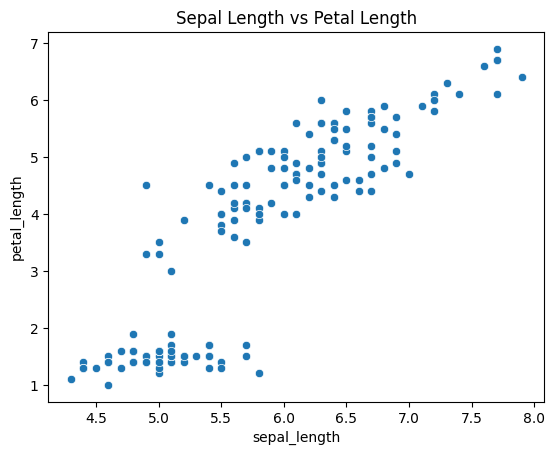

In [4]:
# Write your code from here
sns.scatterplot(x='sepal_length', y='sepal_width', data=df)
plt.title('Sepal Length vs Sepal Width')
plt.show()

sns.scatterplot(x='petal_length', y='petal_width', data=df)
plt.title('Petal Length vs Petal Width')
plt.show()

sns.scatterplot(x='sepal_length', y='petal_length', data=df)
plt.title('Sepal Length vs Petal Length')
plt.show()

Title: Correlation Heatmaps<br>

Task 1: Generate a correlation heatmap of the dataset.<br>
Task 2: Highlight correlation between sepal length and petal length.<br>
Task 3: Highlight correlation between petal width and petal length.<br>

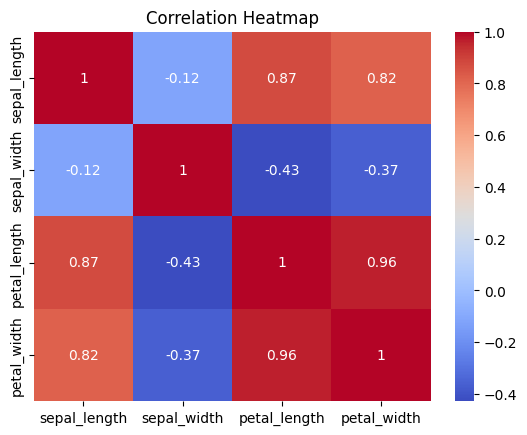

Correlation (Sepal Length vs Petal Length): 0.87
Correlation (Petal Width vs Petal Length): 0.96


In [5]:
# Write your code from here
corr_matrix = df.drop(columns='species').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print(f"Correlation (Sepal Length vs Petal Length): {corr_matrix.loc['sepal_length', 'petal_length']:.2f}")
print(f"Correlation (Petal Width vs Petal Length): {corr_matrix.loc['petal_width', 'petal_length']:.2f}")


**Multivariate Analysis (Higher-Dimensional Data Relationships)**<br>
Objective: Analyze relationships in higher-dimensional data using pair plots and PCA.

Title: Pair Plots<br>

Task 1: Create a pair plot for the Iris dataset.<br>
Task 2: Focus on a subset of features (e.g., only petal dimensions).<br>
Task 3: Exclude one class to observe differences.

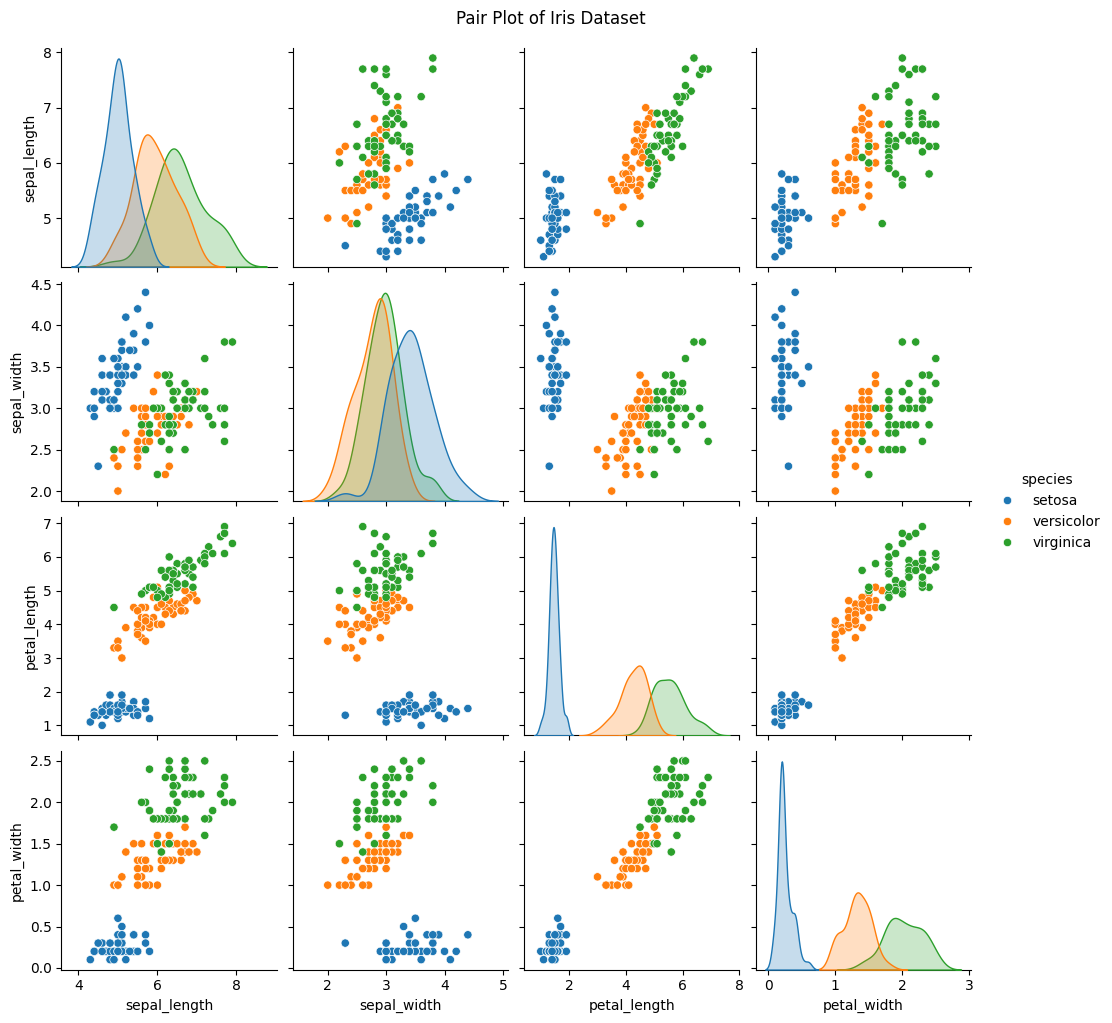

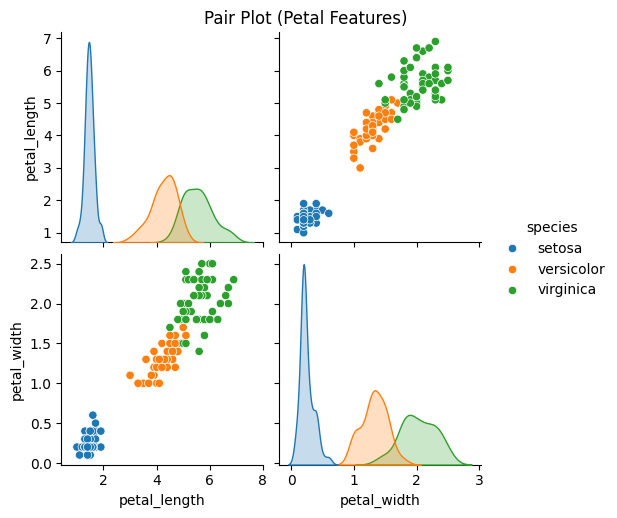

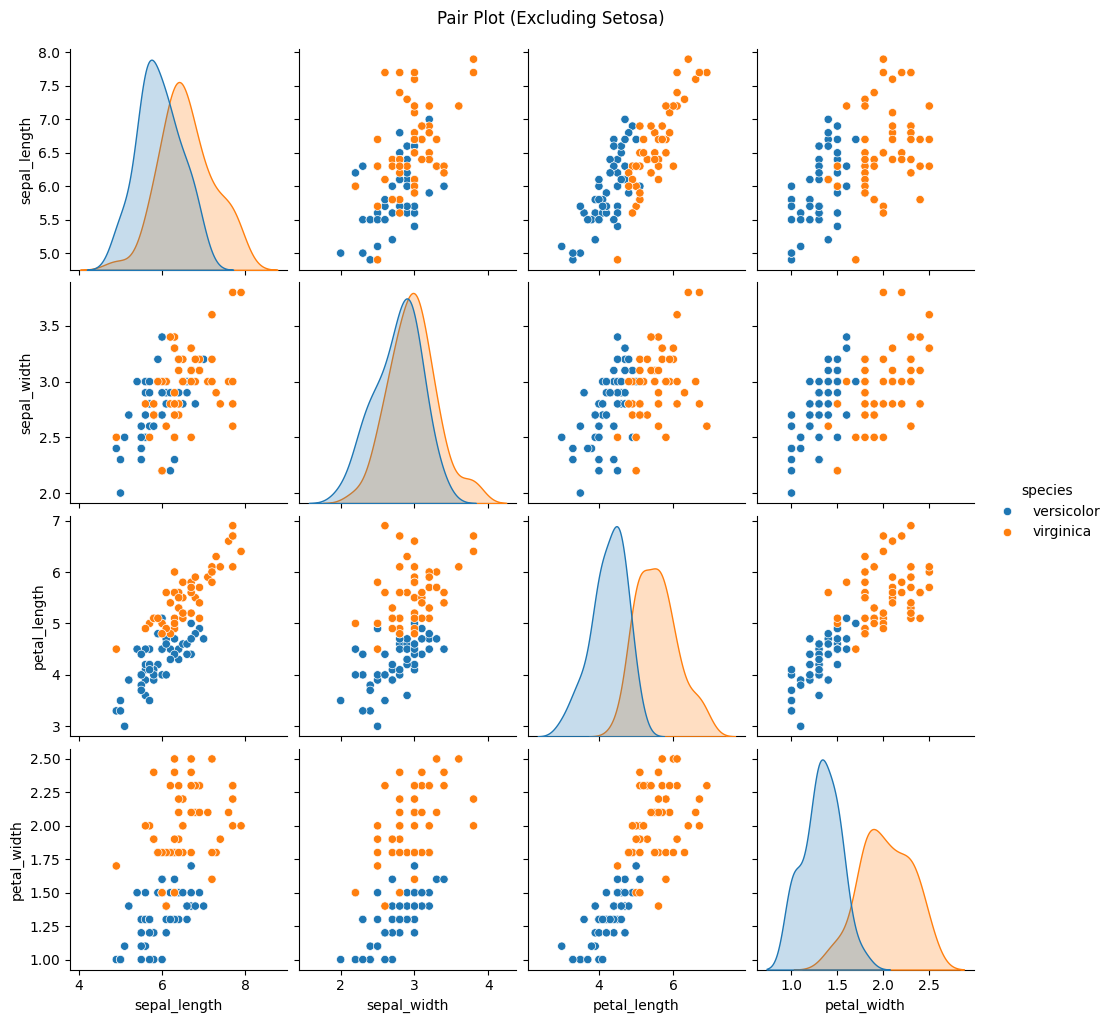

In [6]:
# Write your code from here
sns.pairplot(df, hue='species')
plt.suptitle('Pair Plot of Iris Dataset', y=1.02)
plt.show()

sns.pairplot(df[['petal_length', 'petal_width', 'species']], hue='species')
plt.suptitle('Pair Plot (Petal Features)', y=1.02)
plt.show()

df_no_setosa = df[df['species'] != 'setosa']
sns.pairplot(df_no_setosa, hue='species')
plt.suptitle('Pair Plot (Excluding Setosa)', y=1.02)
plt.show()

Title: Principal Component Analysis (PCA)<br>

Task 1: Perform PCA and plot the first two principal components.<br>
Task 2: Visualize explained variance by each component.<br>
Task 3: Retain more components and visualize in 3D.

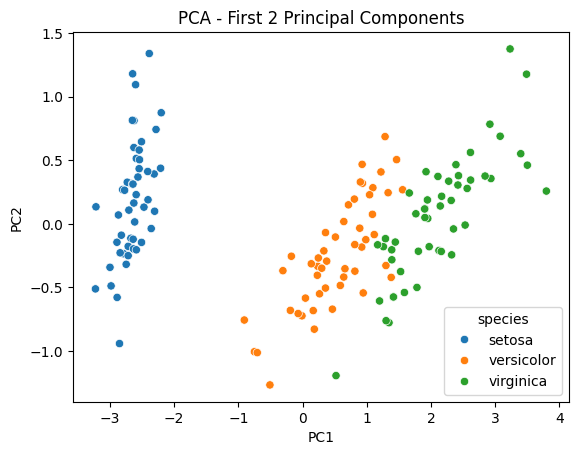

Explained Variance (2 components): [0.92461872 0.05306648]


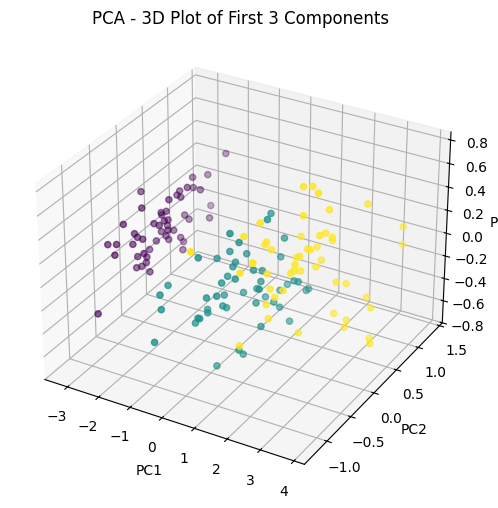

In [7]:
# Write your code from here
X = df.drop(columns='species')
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = df['species']

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species')
plt.title('PCA - First 2 Principal Components')
plt.show()

explained_var = pca.explained_variance_ratio_
print(f"Explained Variance (2 components): {explained_var}")

from mpl_toolkits.mplot3d import Axes3D
pca_3d = PCA(n_components=3)
X_pca3 = pca_3d.fit_transform(X)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca3[:,0], X_pca3[:,1], X_pca3[:,2], c=df['species'].astype('category').cat.codes, cmap='viridis')
ax.set_title('PCA - 3D Plot of First 3 Components')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

**Statistical Analysis in EDA**<br>

Objective: Calculate basic statistical metrics and explore the relationship between features using correlation and covariance.<br>

Title: Descriptive Statistics<br>

Task 1: Calculate mean, median, and standard deviation of petal length.<br>
Task 2: Calculate skewness and kurtosis of sepal width.<br>
Task 3: Calculate mean, median, and standard deviation of sepal length.

In [8]:
# Write your code from here
print(f"Petal Length - Mean: {df['petal_length'].mean():.2f}, Median: {df['petal_length'].median():.2f}, Std: {df['petal_length'].std():.2f}")
print(f"Sepal Width - Skewness: {skew(df['sepal_width']):.2f}, Kurtosis: {kurtosis(df['sepal_width']):.2f}")
print(f"Sepal Length - Mean: {df['sepal_length'].mean():.2f}, Median: {df['sepal_length'].median():.2f}, Std: {df['sepal_length'].std():.2f}")



Petal Length - Mean: 3.76, Median: 4.35, Std: 1.77
Sepal Width - Skewness: 0.32, Kurtosis: 0.18
Sepal Length - Mean: 5.84, Median: 5.80, Std: 0.83


Title: Correlation & Covariance<br>

Task 1: Compute correlation between sepal length and petal length.<br>
Task 2: Compute covariance between petal width and sepal width.<br>
Task 3: Determine the most correlated pair of features.<br>

In [9]:
# Write your code from here
print(f"Correlation (Sepal Length & Petal Length): {df['sepal_length'].corr(df['petal_length']):.2f}")
print(f"Covariance (Petal Width & Sepal Width): {df['petal_width'].cov(df['sepal_width']):.2f}")

abs_corr = corr_matrix.abs()
np.fill_diagonal(abs_corr.values, 0)
max_corr_pair = abs_corr.stack().idxmax()
print(f"Most correlated features: {max_corr_pair} with correlation {corr_matrix.loc[max_corr_pair]:.2f}")

Correlation (Sepal Length & Petal Length): 0.87
Covariance (Petal Width & Sepal Width): -0.12
Most correlated features: ('petal_length', 'petal_width') with correlation 0.96
